<a href="https://colab.research.google.com/github/SamuelSousaFerreira/ML-para-Neg-cios-Digitais/blob/main/Introdu%C3%A7%C3%A3o_a_Recomenda%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
filmes = pd.read_csv('/movies.csv')
filmes.columns = ['filmeId','titulo','generos']
filmes.set_index('filmeId',inplace=True)
filmes.head()

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [3]:
notas = pd.read_csv('/ratings.csv')
notas.columns = ['usuarioId','filmeId','nota','mmomento']
notas.head()

,usuarioId,filmeId,nota,mmomento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
notas.describe()

,usuarioId,filmeId,nota,mmomento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


# **Primeira tentativa de Recomendação** : heurística de total de votos


In [5]:
total_de_votos = notas['filmeId'].value_counts()
total_de_votos.head()

356     329
318     317
296     307
593     279
2571    278
Name: filmeId, dtype: int64

In [6]:
filmes['total_de_votos'] = total_de_votos # nesse caso faz o join pelo index

filmes.sample(5)

,titulo,generos,total_de_votos
filmeId,,,
5073,"Son's Room, The (Stanza del figlio, La) (2001)",Drama,3.0
69951,"Imaginarium of Doctor Parnassus, The (2009)",Drama|Fantasy,16.0
196,Species (1995),Horror|Sci-Fi,45.0
445,Fatal Instinct (1993),Comedy,12.0
4976,Iris (2001),Drama,4.0


In [7]:
filmes.sort_values(by='total_de_votos',ascending=False).head(10)

,titulo,generos,total_de_votos
filmeId,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251.0
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238.0
110,Braveheart (1995),Action|Drama|War,237.0
589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224.0


# Heurística de nota média X total de votos

In [8]:
notas_medias = notas.groupby('filmeId')['nota'].mean()

In [9]:
filmes['nota_media'] = notas_medias
filmes.sort_values(by=['nota_media'],ascending=False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,1.0,5.0
100556,"Act of Killing, The (2012)",Documentary,1.0,5.0
143031,Jump In! (2007),Comedy|Drama|Romance,1.0,5.0
143511,Human (2015),Documentary,1.0,5.0
143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,1.0,5.0
6201,Lady Jane (1986),Drama|Romance,1.0,5.0
102217,Bill Hicks: Revelations (1993),Comedy,1.0,5.0
102084,Justice League: Doom (2012),Action|Animation|Fantasy,1.0,5.0
6192,Open Hearts (Elsker dig for evigt) (2002),Romance,1.0,5.0


In [10]:
filmes.sort_values(by=['total_de_votos','nota_media'],ascending=False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0,4.164134
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0,4.197068
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0,4.161290
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0,4.192446
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251.0,4.231076
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238.0,3.750000
110,Braveheart (1995),Action|Drama|War,237.0,4.031646
589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224.0,3.970982


In [11]:
filmes.query("total_de_votos>= 50").sort_values(by=['nota_media'],ascending=False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
858,"Godfather, The (1972)",Crime|Drama,192.0,4.289062
2959,Fight Club (1999),Action|Crime|Drama|Thriller,218.0,4.272936
1276,Cool Hand Luke (1967),Drama,57.0,4.271930
750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,97.0,4.268041
904,Rear Window (1954),Mystery|Thriller,84.0,4.261905
1221,"Godfather: Part II, The (1974)",Crime|Drama,129.0,4.259690
48516,"Departed, The (2006)",Crime|Drama|Thriller,107.0,4.252336
1213,Goodfellas (1990),Crime|Drama,126.0,4.250000


In [12]:
#considerando que assisti aos filmes
eu_assisti = [1,21,19,10,11,7,2]
filmes.loc[eu_assisti]

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
21,Get Shorty (1995),Comedy|Crime|Thriller,89.0,3.494382
19,Ace Ventura: When Nature Calls (1995),Comedy,88.0,2.727273
10,GoldenEye (1995),Action|Adventure|Thriller,132.0,3.496212
11,"American President, The (1995)",Comedy|Drama|Romance,70.0,3.671429
7,Sabrina (1995),Comedy|Romance,54.0,3.185185
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818


In [13]:
from pandas import errors
#Será que temos filmes dos genêros que gosto e já assiti?
filmes.query("(generos == 'Adventure|Children|Fantasy') & (total_de_votos >= 50)").drop(eu_assisti, errors='ignore').sort_values(by=['nota_media'],ascending=False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy,107.0,3.761682
41566,"Chronicles of Narnia: The Lion, the Witch and ...",Adventure|Children|Fantasy,62.0,3.443548


Colaborative Filtering X Content based Filtering duas técniccas comuns 
https://analyticsindiamag.com/collaborative-filtering-vs-content-based-filtering-for-recommender-systems/

# Procurar Usuários similares
Procura notas(comportamentos) próximas dos usuários calculando as distâncias.
|X-y| = |y-X|


ValueError: ignored

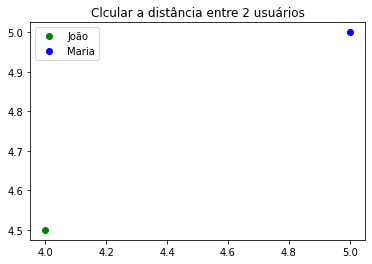

In [17]:
# no plano
import matplotlib.pyplot as plt
plt.plot(4,4.5, 'go')
plt.plot(5,5, 'bo')
plt.legend(['João','Maria'])
plt.title('Clcular a distância entre 2 usuários')

plt.plot([4,5],[4.5,4.5], linestyle ="*")


In [18]:
import numpy as np
joao = np.array([4,4.5])
maria = np.array([5,5])
joao - maria

array([-1. , -0.5])

In [19]:
from math import sqrt
def pitagoras(a,b):
  (delta_x,delta_y ) = a-b
  return sqrt(delta_x * delta_x  + delta_y * delta_y)

  

In [20]:
pitagoras(joao, maria)

1.118033988749895

In [21]:
def pitagoras(a,b):
  return np.linalg.norm(a-b)

In [22]:
pitagoras(joao, maria)


1.118033988749895

In [23]:
joaquina = np.array([3.5,4.5])
print(pitagoras(joao, maria))
print(pitagoras(joao, joaquina))

1.118033988749895
0.5


# Distância usuários dataset

In [24]:
def distancia_de_vetores(a,b):
  return np.linalg.norm(a-b)

In [25]:
def notas_do_usuario(usuario):  
  notas_do_usuario = notas.query(f'usuarioId == {usuario}')
  notas_do_usuario = notas_do_usuario[['filmeId','nota']].set_index('filmeId')
  return notas_do_usuario

In [26]:
usuario4 = notas_do_usuario(4)
usuario1 = notas_do_usuario(1)

In [27]:
diferencas = usuario1.join(usuario4, lsuffix='_esquerda',rsuffix = '_direita').dropna()
diferencas.head()

,nota_esquerda,nota_direita
filmeId,,
47,5.0,2.0
235,4.0,2.0
260,5.0,5.0
296,3.0,1.0
441,4.0,1.0


In [28]:
distancia_de_vetores(diferencas['nota_esquerda'],diferencas['nota_direita'])

11.135528725660043

In [29]:
def distancia_de_usuarios(usuario_id_1, usuario_id_2):
  notas_1 = notas_do_usuario(usuario_id_1)
  notas_2 = notas_do_usuario(usuario_id_2)
  diferencas = notas_1.join(notas_2, lsuffix='_esquerda',rsuffix = '_direita').dropna()
  return distancia_de_vetores(diferencas['nota_esquerda'],diferencas['nota_direita'])

distancia_de_usuarios(4,55)


4.743416490252569

In [30]:
distancia_de_usuarios(1,4)

11.135528725660043

In [31]:
def distancia_de_usuarios(usuario_id_1, usuario_id_2):
  notas_1 = notas_do_usuario(usuario_id_1)
  notas_2 = notas_do_usuario(usuario_id_2)
  diferencas = notas_1.join(notas_2, lsuffix='_esquerda',rsuffix = '_direita').dropna()
  distancia = distancia_de_vetores(diferencas['nota_esquerda'],diferencas['nota_direita'])
  return [usuario_id_1, usuario_id_2, distancia]


In [32]:
distancia_de_usuarios(1,96)

[1, 96, 8.54400374531753]

In [33]:
quantidade_de_usuarios = len(notas['usuarioId'].unique())
print(f'Temos {quantidade_de_usuarios} usuários no dataset.')

Temos 610 usuários no dataset.


In [34]:
def distancia_de_todos(voce_id):
  distancias = []
  for usuario_id in notas['usuarioId'].unique():
    informacoes = distancia_de_usuarios(voce_id,usuario_id)
    distancias.append(informacoes)
  return distancias

distancia_de_todos(3)[0:5]

[[3, 1, 8.200609733428363], [3, 2, 0.0], [3, 3, 0.0], [3, 4, 4.5], [3, 5, 4.5]]

In [35]:
def distancia_de_todos(voce_id):
  todos_usuarios = notas['usuarioId'].unique()
  distancias = [distancia_de_usuarios(voce_id,usuario_id) for usuario_id in todos_usuarios]
  distancias = pd.DataFrame(distancias,columns=['voce','outra_pessoa','distancia'])
  return distancias

distancia_de_todos(1).query('distancia == 0').head()

,voce,outra_pessoa,distancia
0,1,1,0.0
76,1,77,0.0
84,1,85,0.0
174,1,175,0.0
252,1,253,0.0


In [36]:
notas_do_usuario(1).join(notas_do_usuario(5),lsuffix='_1',rsuffix='_5').dropna() #valores null ele dá a distância 0

,nota_1,nota_5
filmeId,,
1,4.0,4.0
50,5.0,4.0
110,4.0,4.0
296,3.0,5.0
316,3.0,2.0
349,4.0,3.0
367,4.0,4.0
457,5.0,4.0
527,5.0,5.0


In [37]:
notas_do_usuario(1).join(notas_do_usuario(85),lsuffix='_1',rsuffix='_5')#.dropna() #valores null ele dá a distância 0

,nota_1,nota_5
filmeId,,
1,4.0,NaN
3,4.0,NaN
6,4.0,NaN
47,5.0,NaN
50,5.0,NaN
...,...,...
3744,4.0,NaN
3793,5.0,NaN
3809,4.0,NaN


In [38]:
notas_do_usuario(1).join(notas_do_usuario(85),lsuffix='_1',rsuffix='_5').dropna() #valores null ele dá a distância 0

,nota_1,nota_5
filmeId,,
527,5.0,5.0


## Usuários com nada em comum colocamos bem distante, outra solução é retirar os usuários do dataset


In [65]:
def distancia_de_usuarios(usuario_id_1, usuario_id_2, minimo = 3):
  notas_1 = notas_do_usuario(usuario_id_1)
  notas_2 = notas_do_usuario(usuario_id_2)
  diferencas = notas_1.join(notas_2,lsuffix='_esquerda',rsuffix='_direita').dropna()

  if(len(diferencas) < minimo):
    return[usuario_id_1, usuario_id_2, 100000]

  distancia =  distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])
  return [usuario_id_1, usuario_id_2, distancia]

In [66]:
def distancia_de_todos(voce_id):
  todos_usuarios = notas['usuarioId'].unique()
  distancias = [distancia_de_usuarios(voce_id,usuario_id) for usuario_id in todos_usuarios]
  distancias = pd.DataFrame(distancias,columns=['voce','outra_pessoa','distancia'])
  return distancias

distancia_de_todos(1).head()

,voce,outra_pessoa,distancia
0,1,1,0.000000
1,1,2,100000.000000
2,1,3,8.200610
3,1,4,11.135529
4,1,5,3.741657


In [67]:
def mais_proximos_de_voce(voce_id):
  distancias = distancia_de_todos(voce_id)
  distancias = distancias.sort_values('distancia')
  distancias = distancias.set_index('outra_pessoa').drop(voce_id)
  return distancias

In [68]:
mais_proximos_de_voce(20)

,voce,distancia
outra_pessoa,,
46,20,0.0
209,20,0.5
146,20,0.5
407,20,0.5
25,20,0.5
...,...,...
241,20,100000.0
499,20,100000.0
237,20,100000.0


In [69]:
distancia_de_usuarios(1,2)

[1, 2, 100000]

#Parâmetros para teste

In [70]:
def distancia_de_todos(voce_id, n=None): #n está vazio como padrão e signnifica o número de usuários que a analisar
  todos_usuarios = notas['usuarioId'].unique()
  if n:
    todos_usuarios = todos_usuarios[:n]
  distancias = [distancia_de_usuarios(voce_id,usuario_id) for usuario_id in todos_usuarios]
  distancias = pd.DataFrame(distancias,columns=['voce','outra_pessoa','distancia'])
  return distancias

In [71]:
def mais_proximos_de_voce(voce_id, n= None):
  distancias = distancia_de_todos(voce_id, n= n)
  distancias = distancias.sort_values('distancia')
  distancias = distancias.set_index('outra_pessoa').drop(voce_id)
  return distancias

In [72]:
mais_proximos_de_voce(10,50)

,voce,distancia
outra_pessoa,,
27,10,1.802776
6,10,2.121320
14,10,2.121320
12,10,2.500000
23,10,2.645751
38,10,2.738613
29,10,3.041381
43,10,3.082207
8,10,3.082207


## Retirndo os usuários indesejados, aquels com valores 100000

In [73]:
def distancia_de_usuarios(usuario_id_1, usuario_id_2, minimo = 3):
  notas_1 = notas_do_usuario(usuario_id_1)
  notas_2 = notas_do_usuario(usuario_id_2)
  diferencas = notas_1.join(notas_2,lsuffix='_esquerda',rsuffix='_direita').dropna()

  if(len(diferencas) < minimo):
    #return[usuario_id_1, usuario_id_2, 100000] #usado na primeira abordagem
    return None

  distancia =  distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])
  return [usuario_id_1, usuario_id_2, distancia]

In [74]:
def distancia_de_todos(voce_id, n=None):
  todos_usuarios = notas['usuarioId'].unique()
  if n:
    todos_usuarios = todos_usuarios[:n]
  distancias = [distancia_de_usuarios(voce_id,usuario_id) for usuario_id in todos_usuarios]
  distancias = list(filter(None,distancias)) #filtra as distancias vazias e cria uma lista com o que sobra
  distancias = pd.DataFrame(distancias,columns=['voce','outra_pessoa','distancia'])
  return distancias

In [95]:
def sugere_para_voce(voce, n = None):
  notas_de_voce = notas_do_usuario(voce)
  filmes_que_voce_ja_viu = notas_de_voce.index

  similares = mais_proximos_de_voce(voce,n = n)
  similar = similares.iloc[0].name
  notas_do_similar = notas_do_usuario(similar)

  notas_do_similar = notas_do_similar.drop(filmes_que_voce_ja_viu, errors = 'ignore')

  recomendacoes = notas_do_similar.sort_values(by='nota', ascending=False)
  return recomendacoes.join(filmes)

In [102]:
sugere_para_voce(1).head(5)

,nota,titulo,generos,total_de_votos,nota_media
filmeId,,,,,
8636,5.0,Spider-Man 2 (2004),Action|Adventure|Sci-Fi|IMAX,79.0,3.803797
58559,5.0,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,149.0,4.238255
33794,5.0,Batman Begins (2005),Action|Crime|IMAX,116.0,3.862069
4993,5.0,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,198.0,4.106061
5349,5.0,Spider-Man (2002),Action|Adventure|Sci-Fi|Thriller,122.0,3.540984


# **Implementação em KNN**
## `Sugerindo baseado em vários usuários`

In [220]:
def mais_proximos_de_voce(voce_id, n_mais_proximos=10, n= None):
  distancias = distancia_de_todos(voce_id, n= n)
  distancias = distancias.sort_values('distancia')
  distancias = distancias.set_index('outra_pessoa').drop(voce_id,errors = 'ignore')
  return distancias.head(n_mais_proximos)

In [145]:
mais_proximos_de_voce(31,n=300) # trouxe as 10 pessoas dentro das 300

,voce,distancia
outra_pessoa,,
188,31,0.000000
52,31,0.500000
248,31,0.707107
196,31,0.866025
273,31,1.000000
26,31,1.000000
29,31,1.118034
286,31,1.224745
20,31,1.224745


In [206]:
def sugere_para_voce(voce,n_mais_proximos = 10, n=None):
  notas_de_voce = notas_do_usuario(voce)
  filmes_que_voce_ja_viu = notas_de_voce.index

  similares = mais_proximos_de_voce(voce, n_mais_proximos = n_mais_proximos, n = n)
  usuarios_similares = similares.index
  notas_dos_similares = notas.set_index('usuarioId').loc[usuarios_similares]
  recomendacoes = notas_dos_similares.groupby('filmeId').mean()[['nota']]
  recomendacoes = recomendacoes.sort_values('nota',ascending = False)
  return recomendacoes.join(filmes)


In [160]:
voce = 50
n = None
n_mais_proximos = 10

sugere_para_voce(voce,n_mais_proximos=50, n=n).head()

,nota,titulo,generos,total_de_votos,nota_media
filmeId,,,,,
765,5.0,Jack (1996),Comedy|Drama,19.0,3.157895
1405,5.0,Beavis and Butt-Head Do America (1996),Adventure|Animation|Comedy|Crime,31.0,2.935484
1411,5.0,Hamlet (1996),Crime|Drama|Romance,16.0,4.000000
6983,5.0,Jane Eyre (1944),Drama|Romance,1.0,5.000000
123,5.0,Chungking Express (Chung Hing sam lam) (1994),Drama|Mystery|Romance,4.0,4.375000


# Testar um novo usuário

In [161]:
filmes.loc[[122904, 1246, 2529, 2329, 2324, 1, 7, 2, 1196, 260]]

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,54.0,3.833333
1246,Dead Poets Society (1989),Drama,86.0,3.959302
2529,Planet of the Apes (1968),Action|Drama|Sci-Fi,56.0,3.803571
2329,American History X (1998),Crime|Drama,129.0,4.217054
2324,Life Is Beautiful (La Vita è bella) (1997),Comedy|Drama|Romance|War,88.0,4.147727
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
7,Sabrina (1995),Comedy|Romance,54.0,3.185185
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818
1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,211.0,4.215640


In [187]:
dados = [
    [122904,5],
    [1246,3],
    [2529,2],
    [2329,4],
    [2324,3],
    [1,2],
    [7,5],
    [2,1],
    [1196,2],
    [260,4]
]
dados

[[122904, 5],
 [1246, 3],
 [2529, 2],
 [2329, 4],
 [2324, 3],
 [1, 2],
 [7, 5],
 [2, 1],
 [1196, 2],
 [260, 4]]

In [202]:
def novo_usuario(dados):
  novo_usuario = notas.usuarioId.max() + 1
  notas_do_usuario_novo = pd.DataFrame(dados, columns=['filmeId','nota'])
  notas_do_usuario_novo['usuarioId'] = novo_usuario
  return pd.concat([notas,notas_do_usuario_novo])

In [204]:
notas = novo_usuario(dados)
notas.tail()

,usuarioId,filmeId,nota,mmomento
5,611,1,2.0,NaN
6,611,7,5.0,NaN
7,611,2,1.0,NaN
8,611,1196,2.0,NaN
9,611,260,4.0,NaN


In [207]:
sugere_para_voce(611)

,nota,titulo,generos,total_de_votos,nota_media
filmeId,,,,,
1090,5.0,Platoon (1986),Drama|War,63.0,3.984127
1639,5.0,Chasing Amy (1997),Comedy|Drama|Romance,52.0,3.576923
4874,5.0,K-PAX (2001),Drama|Fantasy|Mystery|Sci-Fi,33.0,3.484848
92259,5.0,Intouchables (2011),Comedy|Drama,37.0,4.108108
2495,5.0,"Fantastic Planet, The (Planète sauvage, La) (1...",Animation|Sci-Fi,3.0,4.000000
...,...,...,...,...,...
543,0.5,So I Married an Axe Murderer (1993),Comedy|Romance|Thriller,41.0,3.317073
169,0.5,Free Willy 2: The Adventure Home (1995),Adventure|Children|Drama,10.0,2.400000
3440,0.5,Teenage Mutant Ninja Turtles III (1993),Action|Adventure|Children|Comedy|Fantasy,14.0,2.071429


# Utilizar somente as notas de filmes com mais de 50 votos para evitar recomendações de filmes de nicho

In [213]:
filmes_com_mais_de_50_votos = filmes.query('total_de_votos >= 50')

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818
3,Grumpier Old Men (1995),Comedy|Romance,52.0,3.259615
6,Heat (1995),Action|Crime|Thriller,102.0,3.946078
7,Sabrina (1995),Comedy|Romance,54.0,3.185185
...,...,...,...,...
109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52.0,3.778846
109487,Interstellar (2014),Sci-Fi|IMAX,73.0,3.993151
112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59.0,4.050847


In [216]:
notas = notas.set_index('filmeId').loc[filmes_com_mais_de_50_votos.index].reset_index()
notas.head()

,filmeId,usuarioId,nota,mmomento
0,1,1,4.0,9.649827e+08
1,1,5,4.0,8.474350e+08
2,1,7,4.5,1.106636e+09
3,1,15,2.5,1.510578e+09
4,1,17,4.5,1.305696e+09


In [217]:
sugere_para_voce(611)

,nota,titulo,generos,total_de_votos,nota_media
filmeId,,,,,
1090,5.0,Platoon (1986),Drama|War,63.0,3.984127
1639,5.0,Chasing Amy (1997),Comedy|Drama|Romance,52.0,3.576923
11,5.0,"American President, The (1995)",Comedy|Drama|Romance,70.0,3.671429
73017,5.0,Sherlock Holmes (2009),Action|Crime|Mystery|Thriller,58.0,3.853448
76093,5.0,How to Train Your Dragon (2010),Adventure|Animation|Children|Fantasy|IMAX,53.0,3.943396
...,...,...,...,...,...
2710,1.0,"Blair Witch Project, The (1999)",Drama|Horror|Thriller,64.0,2.796875
2355,1.0,"Bug's Life, A (1998)",Adventure|Animation|Children|Comedy,92.0,3.516304
2671,1.0,Notting Hill (1999),Comedy|Romance,56.0,3.455357


In [224]:
def mais_proximos_de_voce(voce_id, n_mais_proximos=10, n= None):
  distancias = distancia_de_todos(voce_id, n= n)
  distancias = distancias.sort_values('distancia')
  distancias = distancias.set_index('outra_pessoa').drop(voce_id,errors = 'ignore')
  return distancias.head(n_mais_proximos)

In [257]:
def sugere_para_voce(voce,n_mais_proximos = 10, n=None):
  notas_de_voce = notas_do_usuario(voce)
  filmes_que_voce_ja_viu = notas_de_voce.index

  similares = mais_proximos_de_voce(voce, n_mais_proximos = n_mais_proximos, n = n)
  usuarios_similares = similares.index
  notas_dos_similares = notas.set_index('usuarioId').loc[usuarios_similares]
  recomendacoes = notas_dos_similares.groupby('filmeId').mean()[['nota']]
  aparicoes = notas_dos_similares.groupby('filmeId').count()[['nota']]

  filtro_minimo = n_mais_proximos/2
  recomendacoes = recomendacoes.join(aparicoes, lsuffix ='_media_dos_usuarios', rsuffix='_aparicoes_nos_usuarios')
  recomendacoes = recomendacoes.query(f'nota_aparicoes_nos_usuarios >=  {filtro_minimo}')

  recomendacoes = recomendacoes.sort_values('nota_media_dos_usuarios',ascending = False)
  recomendacoes = recomendacoes.drop(filmes_que_voce_ja_viu, errors = 'ignore')
  return recomendacoes.join(filmes)


In [258]:
sugere_para_voce(611, n_mais_proximos =10, n= 500)

,nota_media_dos_usuarios,nota_aparicoes_nos_usuarios,titulo,generos,total_de_votos,nota_media
filmeId,,,,,,
608,4.300000,5,Fargo (1996),Comedy|Crime|Drama|Thriller,181.0,4.116022
296,4.285714,7,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0,4.197068
1213,4.250000,6,Goodfellas (1990),Crime|Drama,126.0,4.250000
1089,4.214286,7,Reservoir Dogs (1992),Crime|Mystery|Thriller,131.0,4.202290
1208,4.200000,5,Apocalypse Now (1979),Action|Drama|War,107.0,4.219626
2959,4.200000,5,Fight Club (1999),Action|Crime|Drama|Thriller,218.0,4.272936
1214,4.142857,7,Alien (1979),Horror|Sci-Fi,146.0,3.969178
47,4.100000,5,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,203.0,3.975369
527,4.100000,5,Schindler's List (1993),Drama|War,220.0,4.225000
